Aman Kharwal tarafından 20 Temmuz 2020'de yayımlanan "Data Augmentation in Deep Learning" başlıklı makalede, derin öğrenmede veri artırma (data augmentation) teknikleri ele alınmıştır. Makale, özellikle görüntü verileri üzerinde yapılan dönüşümlerle model performansının nasıl artırılabileceğini ve aşırı öğrenmenin (overfitting) nasıl önlenebileceğini göstermektedir.

## Projede Yapılanlar

## Veri Artırmanın Tanıtımı:
Veri artırma, mevcut veri setine çeşitli dönüşümler uygulayarak yeni veriler oluşturma sürecidir. Bu teknik, modelin genelleme yeteneğini artırmak ve aşırı öğrenmeyi azaltmak için kullanılır.

## TensorFlow ile Görüntü Dönüşümleri:
Makale, TensorFlow kullanarak çeşitli görüntü dönüşümleri gerçekleştirmiştir. Bu dönüşümler arasında yatay çevirme, gri tonlamaya dönüştürme, doygunluk ayarı, parlaklık ayarı, 90 derece döndürme ve merkezi kırpma bulunmaktadır.

## MNIST Veri Seti Üzerinde Uygulama:
Yukarıda belirtilen dönüşümler, MNIST veri setine uygulanarak veri seti genişletilmiş ve bu genişletilmiş veri seti ile bir derin öğrenme modeli eğitilmiştir.

## Kullanılan Teknikler
Yatay Çevirme: Görüntüyü yatay eksende ters çevirme.

Gri Tonlama: Renkli görüntüyü gri tonlamaya dönüştürme.

Doygunluk Ayarı: Görüntünün renk doygunluğunu artırma veya azaltma.

Parlaklık Ayarı: Görüntünün parlaklığını artırma veya azaltma.

Döndürme: Görüntüyü 90 derece döndürme.

Kırpma: Görüntünün merkezi kısmını kırpma.

## Sonuç
Makale, veri artırma tekniklerinin derin öğrenme modellerinin performansını artırmada ve aşırı öğrenmeyi önlemede etkili olduğunu göstermektedir. Özellikle sınırlı veri setleriyle çalışırken, bu tür tekniklerin kullanılması modelin genelleme yeteneğini artırabilir.

Daha fazla bilgi için makalenin tamamına [buradan](https://amanxai.com/2020/07/20/data-augmentation-in-deep-learning/) ulaşabilirsiniz.

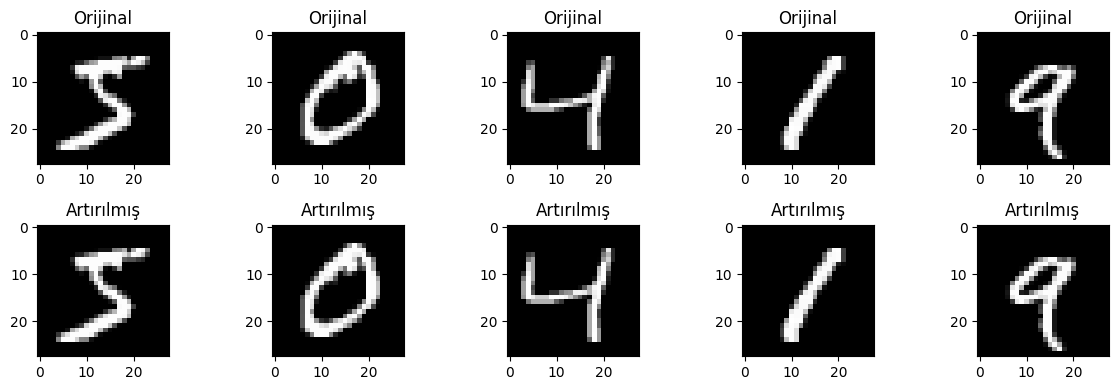

Epoch 1/5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8397 - loss: 0.5200 - val_accuracy: 0.9635 - val_loss: 0.1145
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9678 - loss: 0.1089 - val_accuracy: 0.9692 - val_loss: 0.0930
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9765 - loss: 0.0756 - val_accuracy: 0.9768 - val_loss: 0.0718
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9817 - loss: 0.0578 - val_accuracy: 0.9825 - val_loss: 0.0551
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9859 - loss: 0.0485 - val_accuracy: 0.9814 - val_loss: 0.0596


In [3]:
# 1. Gerekli Kütüphaneleri Yükle
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 2. MNIST Verisini Yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize et ve boyutu (28, 28, 1) yap
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# 3. Görüntü Artırma Fonksiyonları
def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# 4. Örnek Görseller ve Artırılmış Hali
def show_augmented_images():
    fig, axs = plt.subplots(2, 5, figsize=(12, 4))
    for i in range(5):
        original = x_train[i]
        augmented = augment(original)
        axs[0, i].imshow(original.squeeze(), cmap='gray')
        axs[0, i].set_title("Orijinal")
        axs[1, i].imshow(augmented.numpy().squeeze(), cmap='gray')
        axs[1, i].set_title("Artırılmış")
    plt.tight_layout()
    plt.show()

show_augmented_images()

# 5. Veri Setini TF Dataset'e Dönüştür
batch_size = 64

train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(buffer_size=1024)
    .map(lambda x, y: (augment(x), y))
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# 6. Basit CNN Modeli
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 7. Derleme ve Eğitim
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=5)

# 8. Kaydetme (Streamlit ve Huggingface için)
model.save("mnist_augmented_model.h5")
